<table border="1" cellpadding="8" cellspacing="0" style="border-collapse: collapse; background: #fffbe6; color: #222; font-family: Arial, sans-serif;">
  <thead style="background: #ffe066;">
    <tr>
      <th>Import</th>
      <th>Style</th>
      <th>Recommended for</th>
      <th>Syntax</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>from langchain.agents import Tool</code></td>
      <td>Class-based</td>
      <td>Legacy/old agents</td>
      <td><code>Tool(name, func, desc)</code></td>
    </tr>
    <tr>
      <td><code>from langchain_core.tools import tool</code></td>
      <td>Decorator</td>
      <td>Modern/new projects</td>
      <td><code>@tool</code> above a function</td>
    </tr>
  </tbody>
</table>


In [7]:
from typing import Annotated, TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.chat_models import init_chat_model
import gradio as gr

from langgraph.prebuilt import ToolNode, tools_condition
from langchain_tavily import TavilySearch

from datetime import datetime

from langchain_core.tools import tool

from dotenv import load_dotenv
load_dotenv(override=True)

True

In [3]:


search_tool = TavilySearch(
    max_results=4,
    # topic="general",
    # include_answer=False,
    # include_raw_content=False,
    # include_images=False,
    # include_image_descriptions=False,
    # search_depth="basic",
    # time_range="day",
    # include_domains=None,
    # exclude_domains=None
)

In [6]:
datetime.now().isoformat()

'2025-08-09T00:10:52.269075'

In [9]:
@tool
def get_current_date_time()->str:
    """This function give current date and time in iso format"""
    return datetime.now().isoformat()

BaseTool.invoke(input) requires some input (even if it’s not used), because under the hood, it’s expecting a </br>dictionary of arguments, matching the tool’s input schema.</br>

For a no-argument tool, the input schema is just {}.

In [11]:
get_current_date_time.invoke({})

'2025-08-09T00:15:10.002563'

In [14]:
@tool
def my_biography()->str:
    """My biography, everything about me, family, career, personal details, contact, hobbies and more..."""
    file_path = r"A:\Indian_AI_Production_5\agentic_ai\agentic_ai_projects\data\my_biography.txt"
    with open(file_path, "r", encoding='utf-8') as file:
        biography = file.read()
    return biography

In [15]:
my_biography.invoke({})

'Name:\nRhea Sharma\n\nBio:\nRhea Sharma is a dynamic Indian entrepreneur and visionary in the field of artificial intelligence. As the founder and CEO of Indian AI Production, he has played a pivotal role in driving the adoption of agentic AI solutions for businesses across India and Southeast Asia. Rhea is widely respected for his ability to turn complex AI technologies into practical, profitable, and ethical business solutions.\n\nPersonal Details:\nAge: 38\nDate of Birth: 14th August 1986\nHeight: 5’10” (178 cm)\nEye Color: Brown\nHair: Black, short\nNationality: Indian\nLanguages: English, Hindi\nMarital Status: Married\nSpouse: Priya Sharma\nChildren: Aarav (son, age 8), Riya (daughter, age 5)\nCurrent Residence: New Delhi, India\n\nFamily Background:\nRhea comes from an academically inclined family in North India. His father, Dr. Prakash Sharma, is a retired university professor, while his mother, Anita Sharma, is a librarian. His younger sister, Sneha, is a software engineer cu

In [16]:
tools = [search_tool, get_current_date_time, my_biography]

In [17]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [ ]:
    gpt_models_name = 'gpt-4.1-nano-2025-04-14'
    llm = init_chat_model(gpt_models_name)

In [19]:
def chatbot(state: State)->State:
    response = llm.bind_tools(tools).invoke(state['messages'])
    return State(messages=response)

In [20]:
tool_node = ToolNode(tools=tools)

In [21]:
graph_builder.add_node('chatbot', chatbot)
graph_builder.add_node('tools', tool_node)

In [22]:
graph_builder.add_edge(START, 'chatbot')
graph_builder.add_conditional_edges('chatbot', tools_condition)
graph_builder.add_edge('tools', 'chatbot')

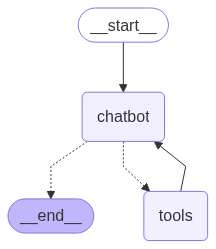

In [23]:
graph = graph_builder.compile()
graph

In [24]:
graph_response = graph.invoke({'messages':["Who am I?"]})
graph_response

{'messages': [HumanMessage(content='Who am I?', additional_kwargs={}, response_metadata={}, id='73ed30f4-a865-499f-bb0b-4aadc1853ecb'),
  AIMessage(content="I don't have any information about you. Could you tell me more about yourself or clarify what you'd like to know?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 1323, 'total_tokens': 1347, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C2MaAkGY5snrOvvZTarsykKS9BcSw', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5e8b2057-59d7-4302-8589-df476d0bf083-0', usage_metadata={'input_tokens': 1323, 'output_tokens': 24, 'total_tokens': 1347, 'input_token_details': {'audio': 0, 'cache_read':

In [25]:
graph_response = graph.invoke({'messages':["what is my name?"]})
graph_response

{'messages': [HumanMessage(content='what is my name?', additional_kwargs={}, response_metadata={}, id='f12d1537-bbf6-46b4-9562-f0f21af2f882'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_tAc2VSqvK6pEu8R5EoHOtc0P', 'function': {'arguments': '{}', 'name': 'my_biography'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 1324, 'total_tokens': 1336, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C2Madk1WfUptjY2SlOgfBNgxDfAIv', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--1254cc69-e018-4641-b666-6fd12bb3d1fb-0', tool_calls=[{'name': 'my_biography', 'args': {}, 'id': 'call_tAc2VSqvK6pEu8R5EoHOtc0P', 'type

In [26]:
graph_response = graph.invoke({'messages':["what is my mother name?"]})
graph_response

{'messages': [HumanMessage(content='what is my mother name?', additional_kwargs={}, response_metadata={}, id='99c4636a-e259-49a7-bb7c-f8c621ff2b16'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_aoXYuqoXSDf3wNkChmqi8csM', 'function': {'arguments': '{}', 'name': 'my_biography'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 1325, 'total_tokens': 1337, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C2MbRwDPn0ylWjVtKnmpPdcUGTOav', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--b119a1b0-4918-45a6-aa46-6a330c2423ba-0', tool_calls=[{'name': 'my_biography', 'args': {}, 'id': 'call_aoXYuqoXSDf3wNkChmqi8csM'

In [27]:
graph_response = graph.invoke({'messages':["what is current date?"]})
graph_response

{'messages': [HumanMessage(content='what is current date?', additional_kwargs={}, response_metadata={}, id='392c4cfc-bf34-4428-9ca1-6bcdf921d314'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jTGntjkBaQWJHiNqRlL1bNUJ', 'function': {'arguments': '{}', 'name': 'get_current_date_time'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 1324, 'total_tokens': 1336, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1152}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-C2Mc0m8aS5xrdsZdEtUF8MIEXHYTl', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2ae2765c-6bd6-438c-abec-6e83499c62a4-0', tool_calls=[{'name': 'get_current_date_time', 'args': {}, 'id': 'call_jTGntjkBa

In [28]:
def chatbot_app(user_input: str, history)->str:
    initial_state = State(messages=[{'role':'user', 'content':user_input}])
    response = graph.invoke(initial_state)

    huamn_message = response['messages'][0].content
    ai_message = response['messages'][-1].content

    print("User :", huamn_message)
    print("AI :", ai_message)
    print("--"*20)

    return ai_message

In [29]:
gr.ChatInterface(chatbot_app, type='messages').launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


User : what is todays date?
AI : Today's date is August 9, 2025.
----------------------------------------
User : what is my son name?
AI : Your son's name is Aarav.
----------------------------------------
User : what is my age and profession
AI : Based on the biography, your age is 38 years old and your profession is an entrepreneur and the founder and CEO of Indian AI Production, specializing in artificial intelligence solutions.
----------------------------------------
User : what  is current weather of USA
AI : The current weather information for the USA indicates that the weather is generally hot, with average temperatures ranging between 68°F and 82°F. There are also predictions of about 3 to 8 days of rain in various parts of the country. For specific details about the weather in a particular region or city, I recommend checking local weather services.
----------------------------------------
User : who are you?
AI : I am an AI language model created by OpenAI, here to assist yo